In [59]:
import requests

def download_raw_file(url, file_path):
    """
    Downloads a raw file from GitHub and saves it to the specified file path.
    
    Args:
    url (str): The URL of the raw file on GitHub.
    file_path (str): The file path where the raw file should be saved.
    """
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_path, "wb") as f:
            f.write(response.content)
        print(f"File saved to {file_path}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

In [60]:
url = "https://raw.githubusercontent.com/Md-Mahbub-Islam/Machine-Learning-MP2/main/Sentiment140.tenPercent.sample.tweets.tsv"
file_path = "sentiment.tsv"
download_raw_file(url, file_path)

File saved to sentiment.tsv


In [61]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import string 
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [62]:
# read TSV file with tab delimiter
df = pd.read_csv('sentiment.tsv', delimiter='\t')

# display the first few rows of the DataFrame
print(df.head())

   sentiment_label                                         tweet_text
0                4  @elephantbird Hey dear, Happy Friday to You  A...
1                4  Ughhh layin downnnn    Waiting for zeina to co...
2                0  @greeniebach I reckon he'll play, even if he's...
3                0              @vaLewee I know!  Saw it on the news!
4                0  very sad that http://www.fabchannel.com/ has c...


In [63]:
# Getting Null Values Count

np.sum(df.isnull().any(axis=1))

0

In [64]:
#Getting Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sentiment_label  160000 non-null  int64 
 1   tweet_text       160000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [65]:
# Postive review is marked as 4, changing it to 1 and Negative review is 0.
df['sentiment_label'] = df['sentiment_label'].replace(4,1)

Positive    80000
Negative    80000
Name: sentiment_label, dtype: int64


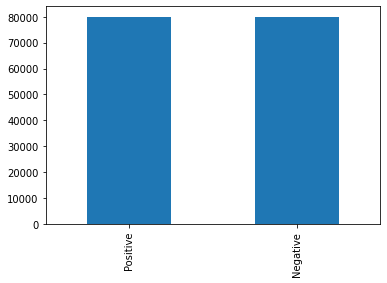

In [66]:
# Visualising the distribution of the target variable.
sentiment = {0:"Negative", 1:"Positive"}
print(df.sentiment_label.apply(lambda x: sentiment[x]).value_counts())
df.sentiment_label.apply(lambda x: sentiment[x]).value_counts().plot(kind = 'bar')
plt.show()

We can say that the dataset is well balanced

In [67]:
df.tail()

,sentiment_label,tweet_text
159995,0,STILL @ panera...studying for &quot;mock&quot;...
159996,0,Insomnia is out of control tonight--haven't sl...
159997,1,@Covergirl08 I take pride in what I do
159998,1,heading to work on the 6
159999,1,@queith asi es!


Preprocessing

In [68]:
#lowering cases
df['tweet_text'] = df['tweet_text'].str.lower()
df.tail()

,sentiment_label,tweet_text
159995,0,still @ panera...studying for &quot;mock&quot;...
159996,0,insomnia is out of control tonight--haven't sl...
159997,1,@covergirl08 i take pride in what i do
159998,1,heading to work on the 6
159999,1,@queith asi es!


In [69]:
data = df

In [70]:
#stopword removal
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['tweet_text'] = data['tweet_text'].apply(lambda text: cleaning_stopwords(text))
data['tweet_text'].tail()

159995    still @ panera...studying &quot;mock&quot; boa...
159996        insomnia control tonight--haven't slept wink.
159997                              @covergirl08 take pride
159998                                       heading work 6
159999                                      @queith asi es!
Name: tweet_text, dtype: object

In [71]:
# nltk
import nltk #a natural language processing toolkit module associated in anaconda
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer

In [72]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
# Removing stop words using nltk lib

#Tokenization of text
tokenizer=ToktokTokenizer() 

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#Removing standard english stopwords like prepositions, adverbs
stop = set(stopwords.words('english'))
print("NLTK stop word lists \n")
print(stop)

#Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

NLTK stop word lists 

{'being', 'and', 'further', 'again', 'into', 'where', 'the', "mightn't", 'themselves', 'down', 'we', 'd', 'won', 'mightn', 'shan', 'more', "hadn't", 'all', 'have', 'too', 'hasn', 'don', 'other', 'she', 'ourselves', 'he', 'aren', 'o', 'just', 'did', "shan't", 're', 'me', 'do', 'has', 'so', 'them', 'any', "you're", "shouldn't", 'some', 'herself', "you'll", 'hers', 'it', "couldn't", 'haven', 'weren', 'if', "don't", 'off', 'than', 'up', 'very', "mustn't", 'above', 'was', 'before', 'own', 'ain', "doesn't", 'against', 'your', "isn't", 'yours', 'each', 'they', 'no', "haven't", 'whom', 'is', 'isn', "should've", 'myself', 'while', 'am', 'this', 'only', 'ma', 'these', 'her', 'my', 'from', 'how', 'such', 'wouldn', 'their', 'in', 'should', 's', 'out', 'after', 'on', 'y', "won't", 'those', 'here', 'which', 'does', 'both', "needn't", 'are', 'his', 'couldn', 'through', 'there', 'an', "it's", 'didn', 'to', 'needn', 'during', 'you', 'of', 'about', 'wasn', 'between', 't', 'yoursel

In [74]:
data['tweet_text'] = data['tweet_text'].apply(remove_stopwords)
data['tweet_text'].tail()

159995    still @ panera ... studying &quot ; mock&quot ...
159996           insomnia control tonight -- ' slept wink .
159997                              @covergirl08 take pride
159998                                       heading work 6
159999                                     @queith asi es !
Name: tweet_text, dtype: object

In [75]:
import re

In [76]:
# removing URLs

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['tweet_text'] = data['tweet_text'].apply(lambda x: cleaning_URLs(x))
data['tweet_text'].head()

0    @elephantbird hey dear , happy friday already ...
1     ughhh layin downnnn waiting zeina cook breakfast
2    @greeniebach reckon ' play , even ' 100 % ... ...
3                           @valewee know ! saw news !
4       sad  sed down. one web services ' used 5 years
Name: tweet_text, dtype: object

In [77]:
# removing numbers 

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['tweet_text'] = data['tweet_text'].apply(lambda x: cleaning_numbers(x))
data['tweet_text'].head()

0    @elephantbird hey dear , happy friday already ...
1     ughhh layin downnnn waiting zeina cook breakfast
2    @greeniebach reckon ' play , even '  % ... kno...
3                           @valewee know ! saw news !
4        sad  sed down. one web services ' used  years
Name: tweet_text, dtype: object

In [78]:
# fucntion to removes pattern in the input text.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [79]:
# remove twitter handles (@user)

data['tweet_text'] = np.vectorize(remove_pattern)(data['tweet_text'], "@[\w]*")
data.head()

,sentiment_label,tweet_text
0,1,"hey dear , happy friday already rice ' bowl l..."
1,1,ughhh layin downnnn waiting zeina cook breakfast
2,0,"reckon ' play , even ' % ... know nothing ! ..."
3,0,know ! saw news !
4,0,sad sed down. one web services ' used years


In [80]:
# remove special characters, numbers and punctuations

data['tweet_text'] = data['tweet_text'].str.replace("[^a-zA-Z#]", " ")
data.head(10)

,sentiment_label,tweet_text
0,1,hey dear happy friday already rice bowl l...
1,1,ughhh layin downnnn waiting zeina cook breakfast
2,0,reckon play even know nothing ...
3,0,know saw news
4,0,sad sed down one web services used years
5,0,sings remember alwaysss hear radio nev...
6,1,god ur side anything possible
7,0,stupid
8,0,delved back guts expression engine flexible ...
9,0,a


In [81]:
# remove short words
data['tweet_text'] = data['tweet_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
data.head()

,sentiment_label,tweet_text
0,1,dear happy friday already rice bowl lunch
1,1,ughhh layin downnnn waiting zeina cook breakfast
2,0,reckon play even know nothing without
3,0,know news
4,0,down services used years


In [82]:
# Tokenizing the text

tokenizer = RegexpTokenizer(r'\w+')
data['tweet_text'] = data['tweet_text'].apply(tokenizer.tokenize)
data['tweet_text'].head()

0    [dear, happy, friday, already, rice, bowl, lunch]
1    [ughhh, layin, downnnn, waiting, zeina, cook, ...
2         [reckon, play, even, know, nothing, without]
3                                         [know, news]
4                        [down, services, used, years]
Name: tweet_text, dtype: object

In [83]:
# Applying Stemming

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['tweet_text']= data['tweet_text'].apply(lambda x: stemming_on_text(x))
data['tweet_text'].head()

0    [dear, happy, friday, already, rice, bowl, lunch]
1    [ughhh, layin, downnnn, waiting, zeina, cook, ...
2         [reckon, play, even, know, nothing, without]
3                                         [know, news]
4                        [down, services, used, years]
Name: tweet_text, dtype: object

In [84]:
# Applying Lemmatization

nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return ' ' .join(text)
data['tweet_text'] = data['tweet_text'].apply(lambda x: lemmatizer_on_text(x))
data['tweet_text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0           dear happy friday already rice bowl lunch
1    ughhh layin downnnn waiting zeina cook breakfast
2               reckon play even know nothing without
3                                           know news
4                              down service used year
Name: tweet_text, dtype: object

In [85]:
from wordcloud import WordCloud

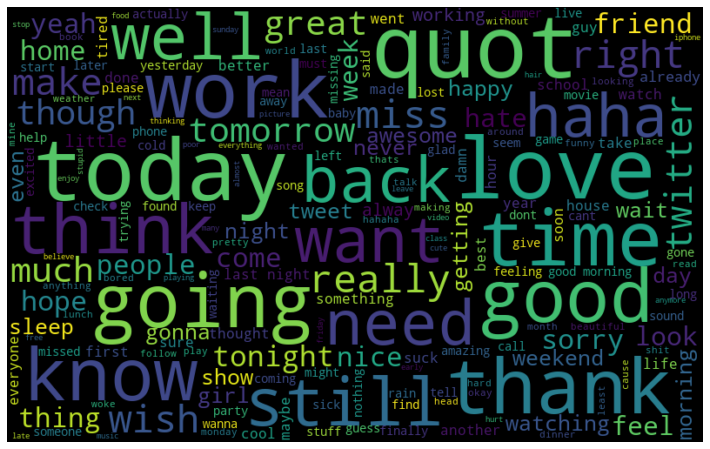

In [86]:
# visualize the frequent words

all_words = " ".join([sentence for sentence in data['tweet_text']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

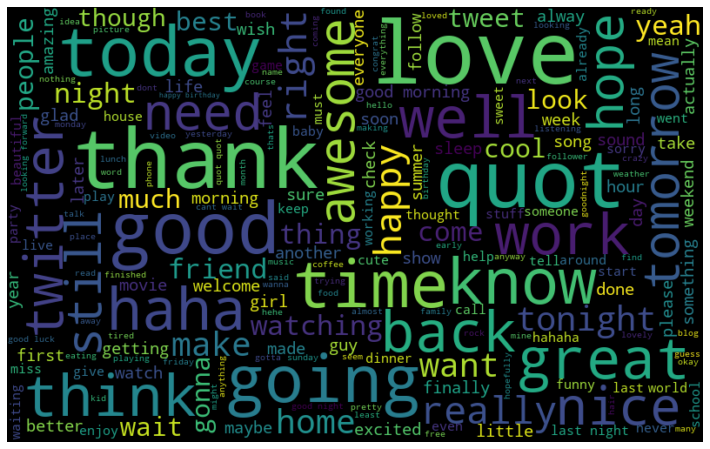

In [87]:
# frequent words visualization for positive

all_words = " ".join([sentence for sentence in data['tweet_text'][data['sentiment_label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

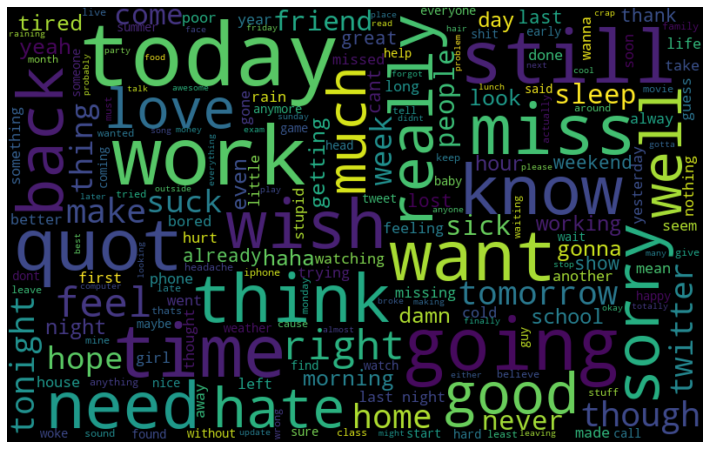

In [88]:
# frequent words visualization for negative

all_words = " ".join([sentence for sentence in data['tweet_text'][data['sentiment_label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Model Building


In [89]:
# Input Feature and Label

X = data.tweet_text
y = data.sentiment_label

In [90]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [91]:
# Splitting our data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
print(f"x_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (120000,)
y_train shape: (120000,)
x_test shape: (40000,)
y_test shape: (40000,)


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.90, min_df=0.02, max_features=1000, stop_words='english')

tfidf.fit(list(X_train) + list(X_test))
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
count_vec.fit(list(X_train) + list(X_test))

X_train_count_vec = count_vec.transform(X_train)
X_test_count_vec = count_vec.transform(X_test)

In [95]:
scores_dict_tfid = {}

In [96]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred_nb, y_test))

naive bayes tfidf accuracy 0.565425


In [114]:
scores_dict_tfid['Multinomial Naive Bayes(Tfid)'] = accuracy_score(y_pred_nb, y_test)


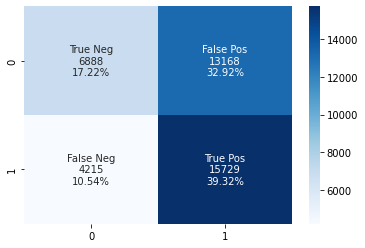

In [141]:
cf_matrix_model = confusion_matrix(y_test, y_pred_nb)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_model.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_model.flatten()/np.sum(cf_matrix_model)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_model, annot=labels, fmt='', cmap='Blues')


In [176]:
new_df = pd.read_csv('sentiment.tsv', delimiter='\t')
new_df['sentiment_label'] = df['sentiment_label'].replace(4,1)

In [177]:
new_df.head()

,sentiment_label,tweet_text
0,1,"@elephantbird Hey dear, Happy Friday to You A..."
1,1,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


In [178]:
X = new_df['tweet_text']
y = new_df['sentiment_label']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [180]:
new_df.head()

,sentiment_label,tweet_text
0,1,"@elephantbird Hey dear, Happy Friday to You A..."
1,1,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


In [181]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(X_train)
sequence_train=tokenizer.texts_to_sequences(X_train)
sequence_test=tokenizer.texts_to_sequences(X_test)

In [182]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 104046 number of independent tokens


In [183]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(107200, 40)

In [184]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(52800, 40)

In [185]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [186]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu', padding='same')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(2,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 40)]              0         
                                                                 
 embedding_21 (Embedding)    (None, 40, 20)            2080940   
                                                                 
 conv1d_51 (Conv1D)          (None, 38, 32)            1952      
                                                                 
 max_pooling1d_35 (MaxPoolin  (None, 12, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_52 (Conv1D)          (None, 10, 64)            6208      
                                                                 
 max_pooling1d_36 (MaxPoolin  (None, 3, 64)            0         
 g1D)                                                     

In [187]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
1072/1072 [==============================] - 22s 20ms/step - loss: 0.6143 - accuracy: 0.6518 - val_loss: 0.5912 - val_accuracy: 0.6743
Epoch 2/5
1072/1072 [==============================] - 21s 20ms/step - loss: 0.5584 - accuracy: 0.7026 - val_loss: 0.6047 - val_accuracy: 0.6669
Epoch 3/5
1072/1072 [==============================] - 22s 20ms/step - loss: 0.5111 - accuracy: 0.7352 - val_loss: 0.6231 - val_accuracy: 0.6628
Epoch 4/5
1072/1072 [==============================] - 23s 21ms/step - loss: 0.4497 - accuracy: 0.7715 - val_loss: 0.6772 - val_accuracy: 0.6557
Epoch 5/5
1072/1072 [==============================] - 22s 21ms/step - loss: 0.3948 - accuracy: 0.7990 - val_loss: 0.7674 - val_accuracy: 0.6427


In [188]:
y_pred=model.predict(data_test)
y_pred

1650/1650 [==============================] - 3s 2ms/step


array([[0.41456196, 0.5854381 ],
       [0.36115664, 0.6388433 ],
       [0.4431718 , 0.5568282 ],
       ...,
       [0.6766533 , 0.32334656],
       [0.9606685 , 0.03933151],
       [0.99015164, 0.00984835]], dtype=float32)

In [189]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [190]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(33.0, 0.5, 'y_pred')

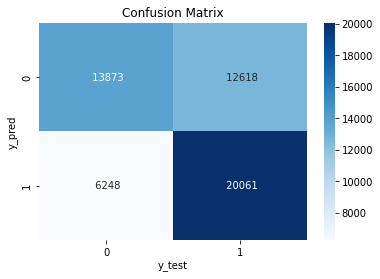

In [191]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

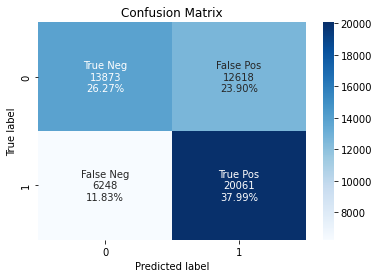

In [192]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
